<a href="https://colab.research.google.com/github/Mayank1325/Customer-Analytics/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# EXPLORATORY DATA ANALYSIS : EDA

**Here's the DATA**

In [6]:
retail_df = pd.read_excel("/content/Online Retail.xlsx")

**Know thy DATA**

In [7]:
retail_df.shape

(541909, 8)

In [8]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
#UNIQUE VALUES
print("Number of Transaction: ",retail_df['InvoiceNo'].nunique())
print("Number of Products Bought: ",retail_df['StockCode'].nunique())
print("Number of Customers: ",retail_df['CustomerID'].nunique())
print("Number of Countries: ",retail_df['Country'].nunique())
print("Number of Customers Null: ",round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )

Number of Transaction:  25900
Number of Products Bought:  4070
Number of Customers:  4372
Number of Countries:  38
Number of Customers Null:  24.93 %


**Ohh! Some Orders are Cancelled** 

In [21]:
#Cancelled, Returned Orders
ccancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [22]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [24]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


**Which is the best Country?**

In [25]:
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


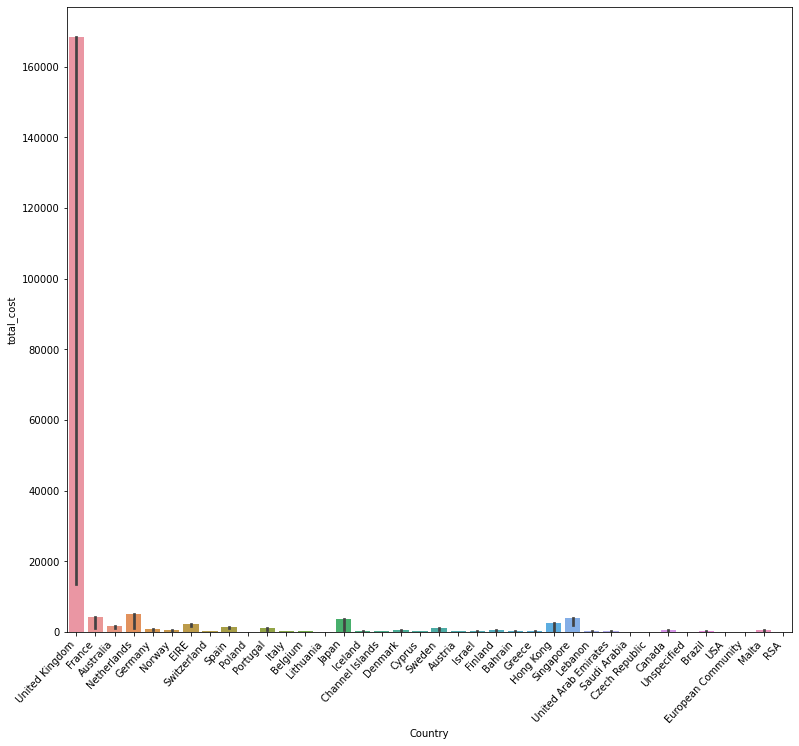

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [27]:
retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)

,Quantity,UnitPrice,CustomerID,total_cost
Country,,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05
Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05
France,110480,4.303199e+04,1.076489e+08,1.974039e+05
Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05
Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04
Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


In [28]:

retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

In [29]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()


,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [30]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


**Most Sold Product?**

In [31]:
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
1068,22197,52928
2620,84077,48326
3655,85099B,43167
3666,85123A,36706
2733,84879,33519
1451,22616,25307
375,21212,24702
1049,22178,23242
39,17003,22801
887,21977,20288


In [32]:

invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


**Number of Products per Order?**

In [33]:
temp_df =retail_uk.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()


,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [34]:
transaction_df.describe()

,CustomerID,Number of products
count,19857.000000,19857.000000
mean,15486.670998,18.224203
std,1623.285203,24.095327
min,12346.000000,1.000000
25%,14096.000000,3.000000
50%,15465.000000,11.000000
75%,16904.000000,24.000000
max,18287.000000,542.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


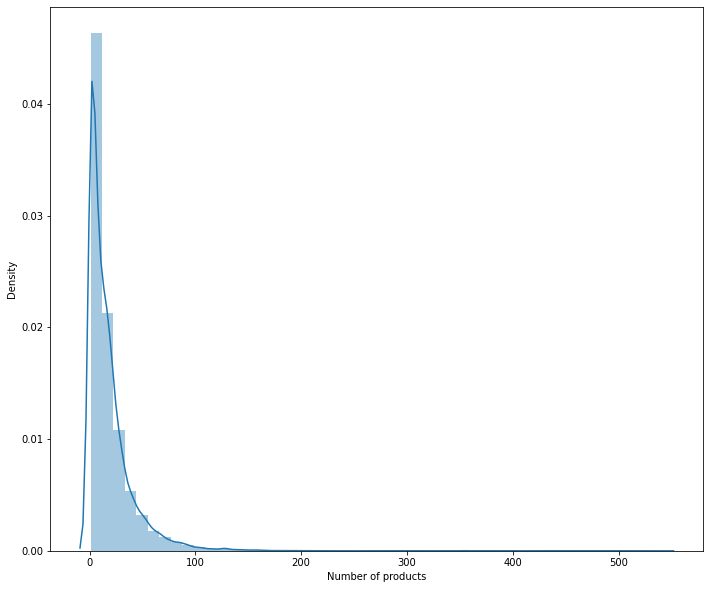

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(transaction_df['Number of products'],ax=ax)
plt.show()


**Number of orders per customer?**

In [36]:
groupby_customers = pd.DataFrame(retail_uk.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12747.0,11
12748.0,224
12749.0,8
12820.0,4


In [37]:
groupby_customers.describe()

,InvoiceNo
count,3950.000000
mean,5.027089
std,8.717306
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,224.000000


# CUSTOMER SEGMENTATION


In [48]:
import datetime as dt
import time, warnings

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_samples, silhouette_score

from pandas.plotting import scatter_matrix

warnings.filterwarnings("ignore")

**Data Cleaning**

In [44]:
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [45]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [49]:
retail_uk['date'] = retail_uk['InvoiceDate'].dt.date

In [63]:
retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True)

In [64]:
retail_uk = retail_uk[retail_uk['InvoiceDate']>= "2010-12-09"]

In [65]:
retail_uk = retail_uk[retail_uk['Quantity']>0]


In [66]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date,TotalCost
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,47.4,2010-12-09,47.4
19640,537880,21669,BLUE STRIPE CERAMIC DRAWER KNOB,12,2010-12-09 09:14:00,1.25,12963.0,United Kingdom,15.0,2010-12-09,15.0
19656,537881,22730,ALARM CLOCK BAKELIKE IVORY,16,2010-12-09 09:23:00,3.75,15513.0,United Kingdom,60.0,2010-12-09,60.0
19668,537882,22804,CANDLEHOLDER PINK HANGING HEART,32,2010-12-09 09:25:00,2.55,15079.0,United Kingdom,81.6,2010-12-09,81.6
19672,537883,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2010-12-09 09:27:00,1.25,14437.0,United Kingdom,15.0,2010-12-09,15.0


**RECENCY**

In [67]:
recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [68]:
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


**Frequency**

In [69]:
# drop duplicates
retail_uk_copy = retail_uk
retail_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4


**Monetary Value**

In [70]:
#create column total cost
retail_uk['TotalCost'] = retail_uk['Quantity'] * retail_uk['UnitPrice']

In [71]:

monetary_df = retail_uk.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,658.89
2,12748.0,3739.23
3,12749.0,98.35
4,12820.0,58.20


**RFM Table**

In [77]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
rfm = temp_df.merge(monetary_df,on='CustomerID')
rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,658.89
12748.0,0,196,3739.23
12749.0,3,5,98.35
12820.0,3,4,58.20


**Validation**

In [78]:
retail_uk[retail_uk['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date,TotalCost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-18,77183.6


In [79]:
(now - dt.date(2011,1,18)).days == 325

True

RFM Visualization

In [107]:
rfm.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.279236,-0.027727
Frequency,-0.279236,1.000000,0.156431
Monetary,-0.027727,0.156431,1.000000


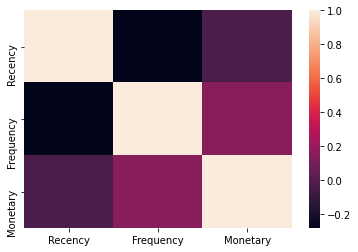

In [108]:
sns.heatmap(rfm.corr())

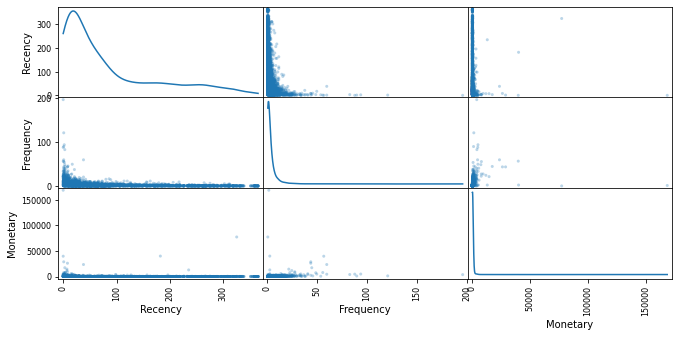

In [110]:
scatter_matrix(rfm, alpha = 0.3, figsize = (11,5), diagonal = 'kde');

Unskewing the Data: logTransform

In [162]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm[x].skew().round(2))
    print(np.log(rfm[x]).skew().round(2))
    print(np.sqrt(rfm[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

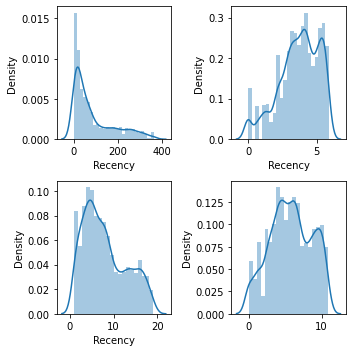

1.24
-0.62
0.57
-0.08


In [163]:
analyze_skewness('Recency')

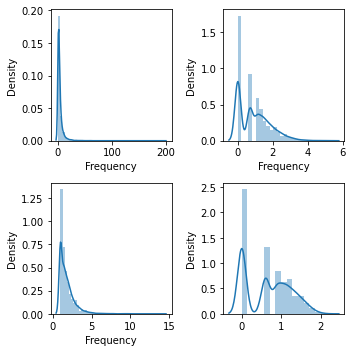

10.48
0.77
2.78
0.15


In [164]:
analyze_skewness('Frequency')

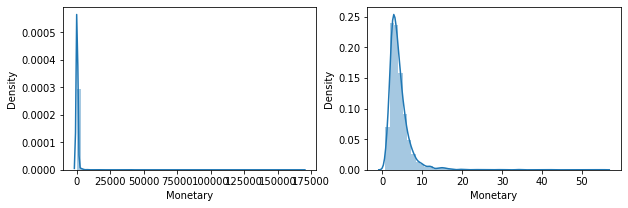

40.16
4.95


In [169]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(rfm['Monetary'], ax=ax[0])
sns.distplot(np.cbrt(rfm['Monetary']), ax=ax[1])
plt.show()
print(rfm['Monetary'].skew().round(2))
print(np.cbrt(rfm['Monetary']).skew().round(2))

In [166]:
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

In [134]:
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [neg_to_zero(x) for x in rfm.Monetary]
rfm.head()

,Recency,Frequency,Monetary,r_quartile
CustomerID,,,,
12346.0,325,1,77183.60,4
12747.0,2,10,658.89,1
12748.0,1,196,3739.23,1
12749.0,3,5,98.35,1
12820.0,3,4,58.20,1


In [139]:
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12747.0,0.693,2.303,6.491
12748.0,0.000,5.278,8.227
12749.0,1.099,1.609,4.589
12820.0,1.099,1.386,4.064


In [140]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,3863.000000,3863.000000,3863.000000
mean,3.700826,0.930134,3.876838
std,1.461780,0.892723,1.535913
min,0.000000,0.000000,-0.942000
25%,2.833000,0.000000,2.856000
50%,3.892000,0.693000,3.807000
75%,4.898000,1.609000,4.800500
max,5.900000,5.278000,12.035000


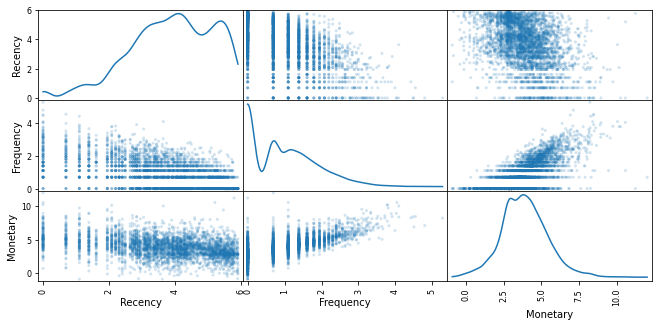

In [141]:
scatter_matrix(rfm_log, alpha = 0.2, figsize = (11,5), diagonal = 'kde');

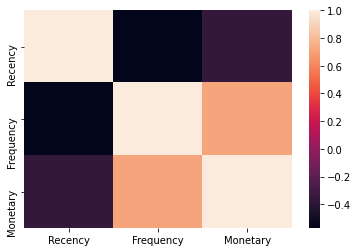

In [142]:
sns.heatmap(rfm_log.corr())

In [143]:
rfm_log.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.569866,-0.357825
Frequency,-0.569866,1.000000,0.715166
Monetary,-0.357825,0.715166,1.000000


In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [146]:
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.425279,-1.042040,4.803734
12747.0,-2.057912,1.538040,1.702245
12748.0,-2.532053,4.870970,2.832664
12749.0,-1.780133,0.760543,0.463733
12820.0,-1.780133,0.510713,0.121873


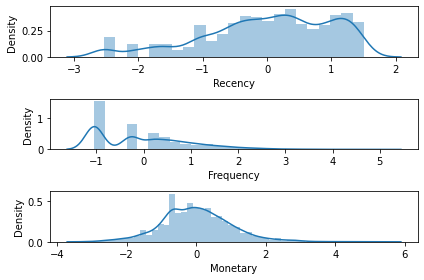

In [147]:
plt.subplot(3, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_scaled.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

Silhouette Score

In [151]:

for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(rfm_log)
    clusters = kmeans.predict(rfm_log)
    silhouette_avg = silhouette_score(rfm_log, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3893514888383398
For n_clusters = 3 The average silhouette_score is : 0.30375731141788914
For n_clusters = 4 The average silhouette_score is : 0.3118630571369662
For n_clusters = 5 The average silhouette_score is : 0.3069748900103072
For n_clusters = 6 The average silhouette_score is : 0.2913867315962116
For n_clusters = 7 The average silhouette_score is : 0.2895301391934479
For n_clusters = 8 The average silhouette_score is : 0.2939406384460795
For n_clusters = 9 The average silhouette_score is : 0.28950981745797105


Elbow Method

In [155]:
# initiate an empty dictionary
wcss = {}

# Elbow method with for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_

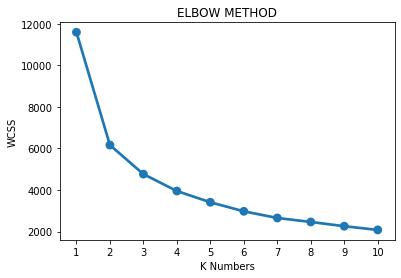

In [171]:
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.title('ELBOW METHOD')
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()


In [172]:
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [173]:
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,r_quartile,K_Cluster
CustomerID,,,,,
12346.0,325,1,77183.60,4,2
12747.0,2,10,658.89,1,1
12748.0,1,196,3739.23,1,1
12749.0,3,5,98.35,1,1
12820.0,3,4,58.20,1,1


In [174]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_scaled)
model.labels_.shape

(3863,)

In [177]:
rfm.groupby('K_Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
K_Cluster                                 
0           148.7       1.2     22.3  1588
1            12.1      11.9   1098.9   737
2            60.5       3.4    174.3  1538

In [178]:
df_normalized = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = clus.labels_
df_normalized.head()

,Recency,Frequency,Monetary,ID,Cluster
CustomerID,,,,,
12346.0,1.425279,-1.042040,4.803734,12346.0,2
12747.0,-2.057912,1.538040,1.702245,12747.0,1
12748.0,-2.532053,4.870970,2.832664,12748.0,1
12749.0,-1.780133,0.760543,0.463733,12749.0,1
12820.0,-1.780133,0.510713,0.121873,12820.0,1


In [179]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12346.0,2,Recency,1.425279
1,12747.0,1,Recency,-2.057912
2,12748.0,1,Recency,-2.532053
3,12749.0,1,Recency,-1.780133
4,12820.0,1,Recency,-1.780133


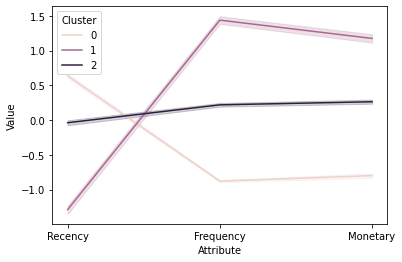

In [180]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

# Market Basket Analysis